The dataset was downloaded from <A href="https://www.kaggle.com/competitions/titanic/overview">Kaggle</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Dataset preparation

In [2]:
df = pd.read_csv('./dataset/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for c in categorical_variables:
                df[c] = LabelEncoder().fit_transform(df[c])

In [6]:
df.drop(['Name', 'Ticket'], axis='columns', inplace=True)

In [7]:
for c in df.select_dtypes(include=['object']):
    c = LabelEncoder().fit_transform(c)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int32  
 9   Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
X = df.drop(['Survived'], axis='columns')
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12, train_size=.8)

# Random forest classifier

This is implemented in order to provide a baseline for comparison.

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



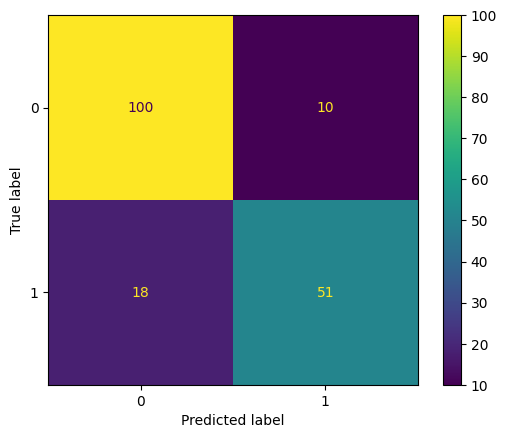

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap = True,
                                  criterion='entropy',
                                  max_features = 'sqrt',
                                  random_state=12)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

print(metrics.classification_report(y_test, pred))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.show()

# Multilayer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam', max_iter=300, random_state=12)
mlp_model.fit(X_train, y_train)

pred = mlp_model.predict(X_test)

print(metrics.classification_report(y_test, pred))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.show()